# SMM Paper 2: How reddit users react to the launch of Optimus Robot

#### Anoushka Shinde (anshinde@iu.edu)



## Sentiment Analysis using VADAR

In [1]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

# Ensure necessary NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to C:\Users\vikas
[nltk_data]     Shinde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\vikas
[nltk_data]     Shinde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\vikas
[nltk_data]     Shinde\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\vikas
[nltk_data]     Shinde\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Script for VADER

In [3]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the data
df = pd.read_csv('reddit_data.csv')

# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text by removing HTML tags, special characters, and irrelevant posts
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    return text.strip()

# Function to preprocess text (tokenization, stopword removal, and lemmatization)
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning and preprocessing
df['Content'] = df['Content'].apply(clean_text).apply(preprocess_text)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment score
def get_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']


# Apply sentiment analysis to the Content column
df['Sentiment_Score'] = df['Content'].apply(get_sentiment_score)


# Calculate average sentiment scores for Section_A and Section_B
average_sentiment = df.groupby('Section')['Sentiment_Score'].mean()

print("Average Sentiment Scores for Each Section:")
print(average_sentiment)


Average Sentiment Scores for Each Section:
Section
Section_A    0.186400
Section_B    0.156142
Name: Sentiment_Score, dtype: float64


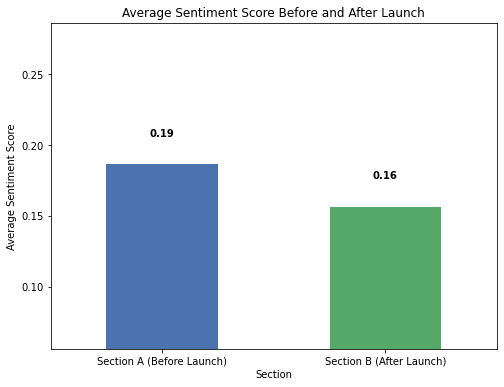

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot: Average Sentiment Score for Section A and Section B

plt.figure(figsize=(8, 6))
bars = average_sentiment.plot(kind='bar', color=['#4C72B0', '#55A868'])

# Adding data labels on top of each bar
for index, value in enumerate(average_sentiment):
    plt.text(index, value + 0.02, f"{value:.2f}", ha='center', fontweight='bold')

# Titles and labels
plt.title('Average Sentiment Score Before and After Launch')
plt.xlabel('Section')
plt.ylabel('Average Sentiment Score')
plt.xticks(ticks=[0, 1], labels=['Section A (Before Launch)', 'Section B (After Launch)'], rotation=0)
plt.ylim(average_sentiment.min() - 0.1, average_sentiment.max() + 0.1)  # Adjust y-axis range for clarity

plt.show()


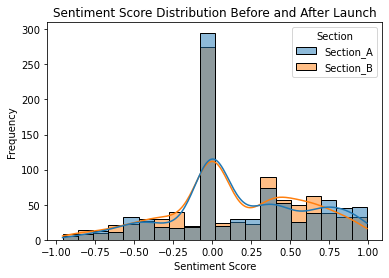

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Sentiment_Score', hue='Section', kde=True, bins=20)
plt.title('Sentiment Score Distribution Before and After Launch')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Function to categorize emotions
def categorize_emotion(score):
    if score >= 0.05:
        return "Positive"
    elif -0.05 <= score :
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis and categorize emotions
df['Sentiment_Score'] = df['Content'].apply(get_sentiment_score)
df['Emotion_Category'] = df['Sentiment_Score'].apply(categorize_emotion)

# Display the first few rows to check the results
print(df[['Content', 'Sentiment_Score', 'Emotion_Category']].head())


                                             Content  Sentiment_Score  \
0         tesla put optimus robot work factory floor           0.0000   
1  feel sorry two intern spend day walking around...          -0.0772   
2  unclear factory robot operating task completin...           0.1280   
3  curiosity point walking robot factory floor it...           0.4215   
4                     dont forget greedbot ceooffice           0.1695   

  Emotion_Category  
0         Negative  
1          Neutral  
2         Positive  
3         Positive  
4         Positive  


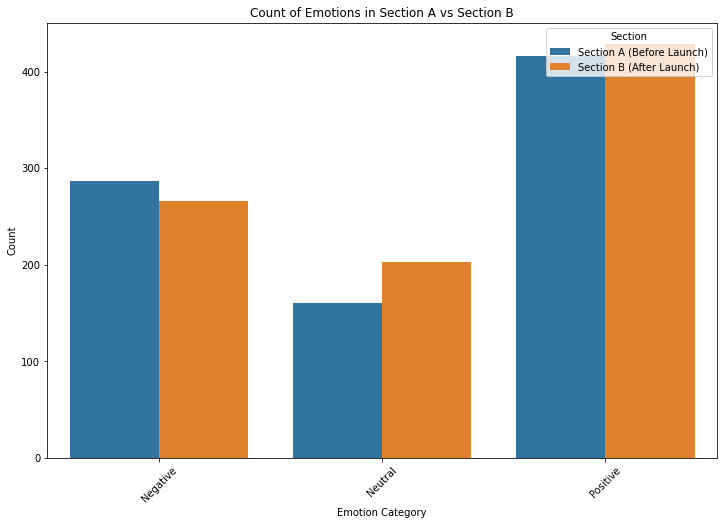

In [7]:
# Plot: Count of Emotions by Section
plt.figure(figsize=(12, 8))
sns.countplot(x='Emotion_Category', hue='Section', data=df)
plt.title('Count of Emotions in Section A vs Section B')
plt.xlabel("Emotion Category")
plt.ylabel("Count")
plt.legend(title='Section', loc='upper right', labels=['Section A (Before Launch)', 'Section B (After Launch)'])
plt.xticks(rotation=45)
plt.show()